# **<center>Potpuni model - Numeričko rešenje**</center>

Poznato nam je početno ponašanje, $a = -g$, i asimptotsko ponašanje, $a \to 0m/s^{2}, v \to -v_{T}$. Možemo da nađemo brzinu rešenjem jednačine<br><center>
$a = \frac{dv}{dt} = -g-\frac{k_{v}}{m}v$, <br></center>
sa početnim uslovom $v(t_{0}) = 0$ korišćenjem Ojlerove metode:<br><center>
$v(t_{i}+\Delta t) = v(t_i) + \Delta t \cdot a(t_i, v(t_i))$</center>

## Analiza numeričkog rešenja

Možemo primetiti da se $v(t)$ i $a(t)$ ponašaju očekivano. Pad počinje sa brzinom nula i sa inicijalnim ubrzanjem od $-g$. Ubrzanje se smanjuje kako se brzina uvećava i kap dostiže stacionarno stanje gde se pomera konstantnom brzinom.<br>
Poredimo dva uprošćena modela. Ponašanje bez otpora vazduha je prikazano grafikonom sa isprekidanom linijom i predstavlja razumnu aproksimaciju za manje brzine, tj. kada je $\mid v\mid \ll v_T = 27.5 m/s$. Dugo vremena brzina se približava $v \to v_T$, što je ilustrovano tačkastom linijom. Uprošćeni modeli su nam korisni, jer pomoću njih možemo da proverimo da li nam je numeričko rešenje korektno.

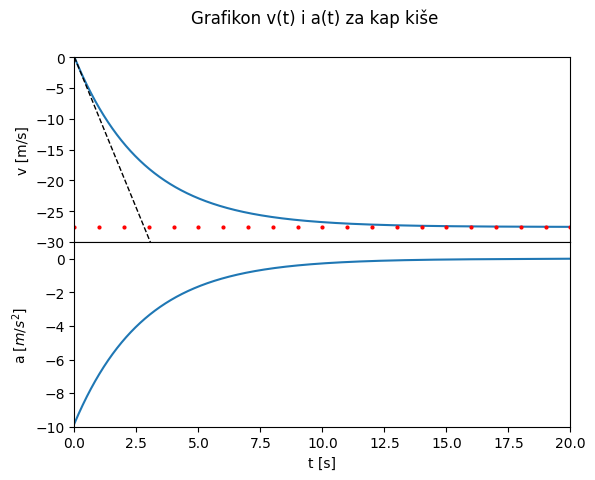

In [51]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np

g = 9.81
kv = 1.85e-7 # Nsmˆ-2
m = 5.2e-7 # kg
time = 20.0
dt = 0.001
v0 = 0.0
n = int(round(time/dt))
v = zeros(n, float)
a = zeros(n, float)
t = zeros(n, float)
v[0] = v0
for i in range(n-1):
    a[i] = -g - (kv/m)*v[i]
    v[i+1] = v[i] + a[i]*dt
    t[i+1] = t[i] + dt

fig, (ax1, ax2) = plt.subplots(2)
plt.suptitle('Grafikon v(t) i a(t) za kap kiše')
plt.subplots_adjust(hspace=0)

ax1.plot(t, v)
ax1.set_ylabel('v [m/s]')
ax1.set_xlim(0, 20)
ax1.set_ylim(-30, 0)
ax1.set_xticks([])

ax2.plot(t, a)
plt.xlabel('t [s]')
ax2.set_ylabel('a [$m/s^2$]')
ax2.set_xlim(0, 20)
ax2.set_ylim(-10, 1)

kv = 0 # Nsmˆ-2
v = zeros(n, float)
a = zeros(n, float)
t = zeros(n, float)
v[0] = v0
for i in range(n-1):
    a[i] = -g - (kv/m)*v[i]
    v[i+1] = v[i] + a[i]*dt
    t[i+1] = t[i] + dt

ax1.plot(t, v, linestyle='--', linewidth=1.0, color='black')

kv = 1.85e-7 # Nsmˆ-2
y=-m*g/kv
ax1.plot(np.arange(0, n, 1), np.array([y for i in range(n)]), 'ro', markersize=2, markevery=1)

plt.show()